In [88]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [89]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()



Text(0.5, 0, 'O número é: 6')

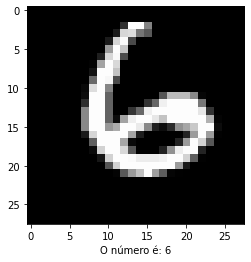

In [90]:
numImage = 48864 #@param {type:"slider", min:0, max:59999, step:1}
primeiraImagem = np.array(x_train[numImage], dtype='uint8')
pixels = primeiraImagem.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.xlabel(f"O número é: {y_train[numImage]}")

In [91]:
x_train.shape

(60000, 28, 28)

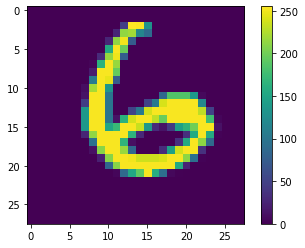

In [92]:
plt.figure()
plt.imshow(x_train[numImage])
plt.colorbar()
plt.grid(False)
plt.show()

Ajustando resolução de pixels de conjunto de treino e teste para intervalo entre [0,1]

In [93]:
x_train, x_test = x_train / 255.0, x_test / 255.0 

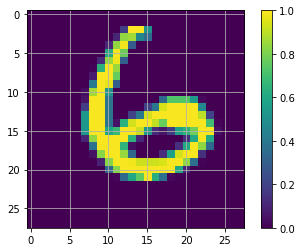

In [94]:
plt.figure()
plt.imshow(x_train[numImage])
plt.colorbar()
plt.grid(True)
plt.show()

Adicionando duas camadas Dense, com uma ativação "relu" e 1000 neurônios. Modelo conta com camada de 10 neurônios que retornam 10 probabilidades

In [95]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), #para a primeira camada de um modelo sequencial precisamos passar o formado da entrada
  tf.keras.layers.Dense(1000,  activation="relu"), #Os parâmetros importante são apenas número de neurônios e função de ativação
  tf.keras.layers.Dense(500,  activation="relu"),
  tf.keras.layers.Dense(20)
])

## Predição e Função de Perda

In [96]:
predicoes = model(x_train).numpy()
funcaoDePerda = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

## Compilação do modelo

In [97]:
model.compile(optimizer='adam',
              loss=funcaoDePerda,
              metrics=['accuracy'])

## Treinamento


In [98]:
model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
750/750 [==============================] - 8s 10ms/step - loss: 0.2070 - accuracy: 0.9377 - val_loss: 0.1062 - val_accuracy: 0.9689
Epoch 2/5
750/750 [==============================] - 7s 10ms/step - loss: 0.0814 - accuracy: 0.9742 - val_loss: 0.1063 - val_accuracy: 0.9692
Epoch 3/5
750/750 [==============================] - 7s 10ms/step - loss: 0.0534 - accuracy: 0.9827 - val_loss: 0.0944 - val_accuracy: 0.9744
Epoch 4/5
750/750 [==============================] - 7s 10ms/step - loss: 0.0428 - accuracy: 0.9863 - val_loss: 0.0888 - val_accuracy: 0.9757
Epoch 5/5
750/750 [==============================] - 7s 10ms/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.1130 - val_accuracy: 0.9732


## Exibindo Resultados

In [99]:
cost, acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Custo: {cost}\nAcurácia: {acc}")

313/313 - 1s - loss: 0.1042 - accuracy: 0.9740
Custo: 0.10421314835548401
Acurácia: 0.9739999771118164


Text(0.5, 0, 'O número predito foi 16 com  48% de confiança')

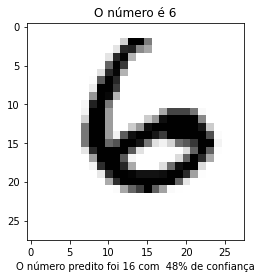

In [100]:

predicaoEscolhida = predicoes[numImage]
predicaoLegenda = np.argmax(predicaoEscolhida)
predicaoMaxima= np.max(predicaoEscolhida)*100
imagem = x_train[numImage]

plt.imshow(imagem, cmap=plt.cm.binary)

plt.title(f"O número é {y_train[numImage]}")
plt.xlabel(f"O número predito foi {predicaoLegenda} com  {predicaoMaxima:2.0f}% de confiança".format(color="green"))
